In [94]:
import matplotlib.pyplot as plt
import numpy as np


In [134]:
#1
ms = 10**7
mp = 10**4
ma = 1
G = 1
R = 20
xs = 0
xp = 20
rs = np.array([xs, 0])
rp = np.array([xp, 0])

rcm = (rp*mp + rs*ms)/(mp+ms)
print('the center of mass for the system is', rcm)

## Now I will need to shift the suns position and the planets position to make the center of mass at the origin

rs = rs - rcm
rp = rp - rcm
#rs = np.array(rs)
#rp = np.array(rp)
rcm = (rp*mp + rs*ms)/(mp+ms)
print('the new center of mass of the system is:', rcm, 'nearly [0 0]')


ra = np.array([R*np.cos(np.radians(45)), R*np.sin(np.radians(45))])
print('The initial location of the asteroid is', ra)

## 2: Calculating the angular velocity

mu = (ms*mp)/(ms+mp)
w = np.sqrt((G*mp*ms)/(mu*R**3))
vs = w * rs[::-1]
vp = w * rp[::-1]
va = np.array([-w * ra[0], w * ra[1]])

ys = np.concatenate([rs, vs])
yp = np.concatenate([rp, vp])
ya = np.concatenate([ra, va])
y_start = np.concatenate((ys, yp, ya))

the center of mass for the system is [0.01998002 0.        ]
the new center of mass of the system is: [-2.90747557e-18  0.00000000e+00] nearly [0 0]
The initial location of the asteroid is [14.14213562 14.14213562]


In [135]:
#3
def KeplerODE3(t, y):
    global mp, ms, G, ma

    rs = y[0:2]
    vs = y[2:4]
    rp = y[4:6]
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]

    # Interbody Distances
    rsp = np.sqrt((rs[0] - rp[0])**2 + (rs[1] - rp[1])**2)
    rsa = np.sqrt((rs[0] - ra[0])**2 + (rs[1] - ra[1])**2)
    rpa = np.sqrt((rp[0] - ra[0])**2 + (rp[1] - ra[1])**2)

    #Sun forces
    sdrdt = vs
    Fsp = (-G*ms*mp)/(rsp**3) * (rs - rp)
    Fsa = (-G*ms*ma)/(rsa**3) * (rs - ra)
    ass = (Fsp + Fsa)/ms

    sdvdt = ass
    sdydt = np.concatenate((sdrdt, sdvdt))

    #Planet forces
    pdrdt = vp
    Fps = (-G*ms*mp)/(rsp**3) * (rp - rs)
    Fsa = (-G*mp*ma)/(rpa**3) * (rp - ra)
    aps = (Fps + Fsa)/mp

    pdvdt = aps
    pdydt = np.concatenate((pdrdt, pdvdt))

    #Asteroid Forces
    adrdt = va
    Fas = (-G*ms*ma)/(rsa**3) * (ra - rs)
    Fap = (-G*mp*ma)/(rpa**3) * (ra - rp)
    aas = (Fas + Fap)/ma

    advdt = aas
    adydt = np.concatenate((adrdt, advdt))

    dydt = np.concatenate((sdydt, pdydt, adydt))
    return dydt



In [144]:
#4
n = 100
t = 0
tmax = int(n/4)
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P/n
y = np.copy(y_start)


sxt = np.array(y[0])
syt = np.array(y[1])

pxt = np.array(y[4])
pyt = np.array(y[5])

axt = np.array(y[8])
ayt = np.array(y[9])


while t<tmax:
    f1 = KeplerODE3(t, y)
    f2 = KeplerODE3(t, y + (dt / 2) * f1)
    f3 = KeplerODE3(t, y + (dt / 2) * f2)    
    f4 = KeplerODE3(t, y + (dt) * f3)
    
    y = y + (dt / 6) * (f1 + 2*f2 + 2*f3 + f4)

    sxt = np.append(sxt, y[0])
    syt = np.append(syt, y[1])
    
    pxt = np.append(pxt, y[4])
    pyt = np.append(pyt, y[5])
    
    axt = np.append(axt, y[8])
    ayt = np.append(ayt, y[9])

    t = t + dt





0.17762652645532806


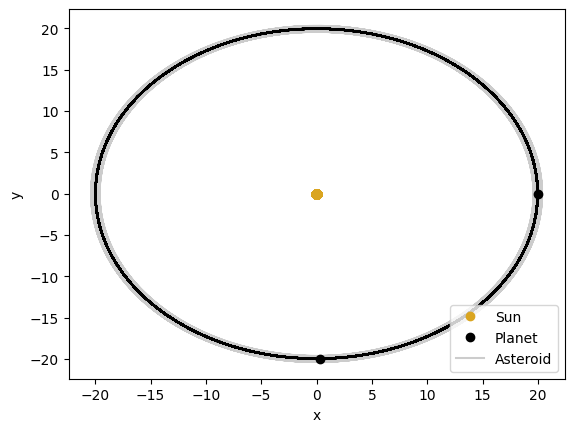

In [146]:
plt.figure()

plt.plot(sxt, syt, 'o', color = 'goldenrod', label = 'Sun')
plt.plot(pxt, pyt, 'o', lw = 1.5, markevery = [0, -1], color = 'black', label = 'Planet')
plt.plot(pxt, pyt, '-', lw = 1.5, markevery = [0, -1], color = 'black')
plt.plot(axt, ayt, '-', lw = 1.5, alpha = 0.2, color = 'black', label = 'Asteroid')

plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-15,25)
# plt.ylim(-5, 25)
plt.legend()
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

4:
The suns trajectory appears as a point since it has such a small deviation from the center of mass. This point like image is not accurate as the earth does in theory orbit.

In my plot I have the asteroids orbit as a light line that surrounds the line of the planet.

In [152]:
#5
def TransformIntoPlanetFrame(xp,yp,x,y):
    phi = np.arctan2(yp,xp)
    s = np.sin(phi)
    c = np.cos(phi)

    A = np.array( [ [c,s] , [-s,c] ] )

    r  = np.array([x,y])
    rt = A.dot(r) # matrix vector multiplication

    xt = rt[0]
    yt = rt[1]
    
    return [xt,yt] #return the transformed coordinates

In [149]:
n = 1000
t = 0
tmax = int(n*20)
dt = P/n
y = np.copy(y_start)


sxt = np.array(y[0])
syt = np.array(y[1])

pxt = np.array(y[4])
pyt = np.array(y[5])

axt = np.array(y[8])
ayt = np.array(y[9])


while t<tmax:
    f1 = KeplerODE3(t, y)
    f2 = KeplerODE3(t, y + (dt / 2) * f1)
    f3 = KeplerODE3(t, y + (dt / 2) * f2)    
    f4 = KeplerODE3(t, y + (dt) * f3)
    
    y = y + (dt / 6) * (f1 + 2*f2 + 2*f3 + f4)

    sxt = np.append(sxt, y[0])
    syt = np.append(syt, y[1])
    
    pxt = np.append(pxt, y[4])
    pyt = np.append(pyt, y[5])
    
    axt = np.append(axt, y[8])
    ayt = np.append(ayt, y[9])

    t = t + dt

I still need to keep track of the asteroids position over time with respect to the planet. To do this, I would need to use the fucntion that you created and then each time I update the asteroids coordinates I would need to run the fuction first. Then I would have to deal with plotting it onto a plot. I am not however gonna do so and rather I am going to just submit what I have so far. I tried my best, but couldn't give any more to this assignment unfortunately...